<a href="https://www.kaggle.com/code/hardikdhamija96/indianfoodpreference?scriptVersionId=241039415" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Indian Food Preference: Regional Analysis of Cuisine
## 🔷 Objective
To analyze regional food preferences across India to help food startups customize their menus.


<div style="text-align: center;">
  <img src="https://raw.githubusercontent.com/hardikdhamija96/IndianFoodPreference/refs/heads/main/CoverImage.png" width=1000>
</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-food-101/indian_food.csv


## 🔷 Business Problem

<div style="text-align: center;">
  <img src="https://raw.githubusercontent.com/hardikdhamija96/IndianFoodPreference/refs/heads/main/ProblemStatement.png" width="400"/>
</div>






In [2]:
# Import Libraries

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Import dataset
df = pd.read_csv('/kaggle/input/indian-food-101/indian_food.csv')
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


## 🔷 Data Overview

In [4]:
# columns
df.columns.tolist()

['name',
 'ingredients',
 'diet',
 'prep_time',
 'cook_time',
 'flavor_profile',
 'course',
 'state',
 'region']

### 🔹 Columns observations

- `name` -> name of dish
- `ingredients`- list of ingredients used
- `diet` - veg/non veg
- `prep_time` - prepare time in mins
- `cook_time` - cook time in mins
- `flavor_profile`- flavour of dish (sweet/salty)
- `course` - time of food(dinner/lunch/breakfast)
- `state` - state of india
- `region` - region in india

### 🔹Possible questions we would like to answer !
- Q1. Famous dishes(names) with respect to region and states
- Q2. Most widely used ingredients
- Q3. Top ingredients respect to state and region
- Q4. Dishes with least ingredients required
- Q5. Meal course required least number of ingredients
- Q6. Ratio of diet preference
- Q7. most veg/non veg wrt states/regions
- Q8. Avg time required for meal wrt course
- Q9. Least Time required for course
- Q10. Which flavour is prefered for a particular meal course
- Q11. Number of dishes wrt state and region

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


### 🔹 Observation 
- No null values beside in `region`
- `ingredients` must be a list
    - `ingredient_count` can be 
- `prep_time` , `cook_time` are of type int
    - `total_time` can be derived
- `diet`,`flavour_profile` ,`course`,`state` and `region` should be category types

### 🔹 Values in different features

In [6]:
# Unique diet
pd.unique(df['diet'])

array(['vegetarian', 'non vegetarian'], dtype=object)

In [7]:
pd.unique(df['state'])

array(['West Bengal', 'Rajasthan', 'Punjab', 'Uttar Pradesh', '-1',
       'Odisha', 'Maharashtra', 'Uttarakhand', 'Assam', 'Bihar',
       'Andhra Pradesh', 'Karnataka', 'Telangana', 'Kerala', 'Tamil Nadu',
       'Gujarat', 'Tripura', 'Manipur', 'Nagaland', 'NCT of Delhi',
       'Jammu & Kashmir', 'Chhattisgarh', 'Haryana', 'Madhya Pradesh',
       'Goa'], dtype=object)

In [8]:
pd.unique(df['region'])

array(['East', 'West', 'North', '-1', 'North East', 'South', 'Central',
       nan], dtype=object)

In [9]:
pd.unique(df['course'])

array(['dessert', 'main course', 'starter', 'snack'], dtype=object)

In [10]:
min_prepTime = df['prep_time'].min()
max_prepTime = df['prep_time'].max()

print("Min Prep time: ", min_prepTime, "; Max Prep time: ", max_prepTime)

Min Prep time:  -1 ; Max Prep time:  500


In [11]:
min_cookTime = df['cook_time'].min()
max_cookTime = df['cook_time'].max()

print("Min Cook time: ", min_cookTime, "; Max Cook time: ", max_cookTime)

Min Cook time:  -1 ; Max Cook time:  720


In [12]:
df['prep_time'].describe()

count    255.000000
mean      31.105882
std       72.554409
min       -1.000000
25%       10.000000
50%       10.000000
75%       20.000000
max      500.000000
Name: prep_time, dtype: float64

In [13]:
df['cook_time'].describe()

count    255.000000
mean      34.529412
std       48.265650
min       -1.000000
25%       20.000000
50%       30.000000
75%       40.000000
max      720.000000
Name: cook_time, dtype: float64

In [14]:
df['diet'].value_counts()

diet
vegetarian        226
non vegetarian     29
Name: count, dtype: int64

In [15]:
df['region'].value_counts()

region
West          74
South         59
North         49
East          31
North East    25
-1            13
Central        3
Name: count, dtype: int64

In [16]:
df['state'].value_counts()

state
Gujarat            35
Punjab             32
Maharashtra        30
West Bengal        24
-1                 24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Karnataka           6
Rajasthan           6
Telangana           5
Bihar               3
Goa                 3
Manipur             2
Jammu & Kashmir     2
Madhya Pradesh      2
Uttarakhand         1
Tripura             1
Nagaland            1
NCT of Delhi        1
Chhattisgarh        1
Haryana             1
Name: count, dtype: int64

In [17]:
df['flavor_profile'].value_counts()

flavor_profile
spicy     133
sweet      88
-1         29
bitter      4
sour        1
Name: count, dtype: int64

In [18]:
df['course'].value_counts()

course
main course    129
dessert         85
snack           39
starter          2
Name: count, dtype: int64

### 🔹 Observation
- `-1` is used in different features for unavailable data

### 🔹 Basic Metric Summary
- 2 major `diet` preference; mostly veg
- cook time is generally higher then prep time; with some exception require lot of time
- 4 flavour types also there is `-1` i.e NA
- 4 meal course
- 5 regions and `-1` for unavailable region

## 🔷 Data Preprocessing

In [19]:
df.columns.tolist()

['name',
 'ingredients',
 'diet',
 'prep_time',
 'cook_time',
 'flavor_profile',
 'course',
 'state',
 'region']

### 🔹1. Data Type Conversion

In [20]:
## Convert ingredient feature
print(type(df['ingredients'].iloc[0]))


<class 'str'>


In [21]:
df['ingredients'].head(3)

0                 Maida flour, yogurt, oil, sugar
1                         Gram flour, ghee, sugar
2    Carrots, milk, sugar, ghee, cashews, raisins
Name: ingredients, dtype: object

In [22]:
df['ingredients_list'] = df["ingredients"].apply(lambda x: [i.strip() for i in x.split(',')])

In [23]:
df['ingredients_list'].head(3)

0                 [Maida flour, yogurt, oil, sugar]
1                         [Gram flour, ghee, sugar]
2    [Carrots, milk, sugar, ghee, cashews, raisins]
Name: ingredients_list, dtype: object

In [24]:
df["diet"].unique()

array(['vegetarian', 'non vegetarian'], dtype=object)

In [25]:
## Converting data type of diet
df['diet'] = df['diet'].astype('category')

In [26]:
df['diet'].dtype

CategoricalDtype(categories=['non vegetarian', 'vegetarian'], ordered=False, categories_dtype=object)

In [27]:
df['flavor_profile'].unique()

array(['sweet', 'spicy', 'bitter', '-1', 'sour'], dtype=object)

In [28]:
## replacing -1 to unknown
df['flavor_profile'] = df['flavor_profile'].replace('-1', 'unknown')


In [29]:
## changing type to category
df['flavor_profile'] = df['flavor_profile'].astype('category')

In [30]:
df['flavor_profile'].dtype

CategoricalDtype(categories=['bitter', 'sour', 'spicy', 'sweet', 'unknown'], ordered=False, categories_dtype=object)

In [31]:
df['course'].unique()

array(['dessert', 'main course', 'starter', 'snack'], dtype=object)

In [32]:
## changing type to category
df['course'] = df['course'].astype('category')

In [33]:
df['state'].unique()

array(['West Bengal', 'Rajasthan', 'Punjab', 'Uttar Pradesh', '-1',
       'Odisha', 'Maharashtra', 'Uttarakhand', 'Assam', 'Bihar',
       'Andhra Pradesh', 'Karnataka', 'Telangana', 'Kerala', 'Tamil Nadu',
       'Gujarat', 'Tripura', 'Manipur', 'Nagaland', 'NCT of Delhi',
       'Jammu & Kashmir', 'Chhattisgarh', 'Haryana', 'Madhya Pradesh',
       'Goa'], dtype=object)

In [34]:
## replacing -1 to unknown
df['state'] = df['state'].replace('-1', 'unknown')


In [35]:
## changing type to category
df['state'] = df['state'].astype('category')

In [36]:
df['region'].unique()

array(['East', 'West', 'North', '-1', 'North East', 'South', 'Central',
       nan], dtype=object)

In [37]:
df['region'] = df['region'].replace('-1','unknown')

In [38]:
df['region']=df['region'].astype('category')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name              255 non-null    object  
 1   ingredients       255 non-null    object  
 2   diet              255 non-null    category
 3   prep_time         255 non-null    int64   
 4   cook_time         255 non-null    int64   
 5   flavor_profile    255 non-null    category
 6   course            255 non-null    category
 7   state             255 non-null    category
 8   region            254 non-null    category
 9   ingredients_list  255 non-null    object  
dtypes: category(5), int64(2), object(3)
memory usage: 12.9+ KB


### 🔹 2. Null Handling

In [40]:
df['region'].value_counts()

region
West          74
South         59
North         49
East          31
North East    25
unknown       13
Central        3
Name: count, dtype: int64

In [41]:
df['region'].isnull().sum()


1

In [42]:
df['region'] = df['region'].fillna('unknown')

In [43]:
df['region'].isnull().sum()


0

In [44]:
df['region'].value_counts()

region
West          74
South         59
North         49
East          31
North East    25
unknown       14
Central        3
Name: count, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name              255 non-null    object  
 1   ingredients       255 non-null    object  
 2   diet              255 non-null    category
 3   prep_time         255 non-null    int64   
 4   cook_time         255 non-null    int64   
 5   flavor_profile    255 non-null    category
 6   course            255 non-null    category
 7   state             255 non-null    category
 8   region            255 non-null    category
 9   ingredients_list  255 non-null    object  
dtypes: category(5), int64(2), object(3)
memory usage: 12.9+ KB


### 🔹 3. Feature Engineering
#### 🔹Derived Column
- `num_ingredients` from `ingredients` --> Number of ingredients
- `total_time` from `prep_time` & `cook_time` --> total time for a meal
- `time_category` from `total_time` --> categorizing bazed on time required

In [46]:
# creating new col
df['num_ingredients'] = df['ingredients_list'].apply(len)

In [47]:
#verifying new column
df[['ingredients','num_ingredients']].head()

,ingredients,num_ingredients
0,"Maida flour, yogurt, oil, sugar",4
1,"Gram flour, ghee, sugar",3
2,"Carrots, milk, sugar, ghee, cashews, raisins",6
3,"Flour, ghee, kewra, milk, clarified butter, su...",10
4,"Milk powder, plain flour, baking powder, ghee,...",8


In [48]:
# check its info
df['num_ingredients'].describe()

count    255.000000
mean       4.454902
std        1.205681
min        2.000000
25%        4.000000
50%        5.000000
75%        5.000000
max       10.000000
Name: num_ingredients, dtype: float64

#### 🔹 Observation
- on an average a dish takes 4-5 ingredients
- simplest ones use 2 vs complex ones require 10
- most of dishes(75%) use <=5 ingredients

In [49]:
df['total_time'] = df['prep_time']+df['cook_time']

In [50]:
df[['prep_time','cook_time','total_time']].head()

,prep_time,cook_time,total_time
0,45,25,70
1,80,30,110
2,15,60,75
3,15,30,45
4,15,40,55


In [51]:
df['total_time'].value_counts()

total_time
 50     35
 30     30
-2      28
 60     23
 40     19
 45     18
 70     13
 35     11
 55      8
 25      7
 20      6
 90      5
 65      5
 100     5
 75      4
 80      3
 10      3
 450     3
 150     3
 85      2
 270     2
 59      2
 240     2
 105     2
 15      1
 140     1
 535     1
 180     1
 36      1
 175     1
 300     1
 620     1
 17      1
 165     1
 285     1
 730     1
 110     1
 510     1
 130     1
 52      1
Name: count, dtype: int64

In [52]:
df[(df['prep_time'] <= 0) | (df['cook_time'] <=0)]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,ingredients_list,num_ingredients,total_time
19,Sohan papdi,"Gram flour, ghee, sugar, milk, cardamom",vegetarian,-1,60,sweet,dessert,Maharashtra,West,"[Gram flour, ghee, sugar, milk, cardamom]",5,59
21,Chhena kheeri,"Chhena, sugar, milk",vegetarian,-1,60,sweet,dessert,Odisha,East,"[Chhena, sugar, milk]",3,59
65,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,-1,-1,spicy,main course,Tripura,North East,"[Boiled pork, onions, chillies, ginger and gar...",4,-2
132,Kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South,"[Sesame oil, drumstick, tamarind paste, sambar...",5,-2
134,Keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South,"[Urad dal, curry leaves, sugar, mustard seeds,...",5,-2
148,Paravannam,"Raw rice, jaggery, milk",vegetarian,-1,-1,spicy,main course,Kerala,South,"[Raw rice, jaggery, milk]",3,-2
152,Poriyal,"Chana dal, urad dal, beans, coconut, mustard",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South,"[Chana dal, urad dal, beans, coconut, mustard]",5,-2
167,Kolim Jawla,"Baingan, fish, coconut oil, fresh coconut, ginger",non vegetarian,-1,-1,spicy,main course,Maharashtra,West,"[Baingan, fish, coconut oil, fresh coconut, gi...",5,-2
172,Bombil fry,"Bombay duck, malvani masala, rice flour, bomba...",non vegetarian,-1,-1,spicy,main course,Maharashtra,West,"[Bombay duck, malvani masala, rice flour, bomb...",5,-2
185,Ghooghra,"Dry fruits, semolina, all purpose flour",vegetarian,-1,-1,spicy,snack,Gujarat,West,"[Dry fruits, semolina, all purpose flour]",3,-2


#### ‼️ dealing with prep_time/cook_time == -1

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='prep_time', ylabel='Count'>

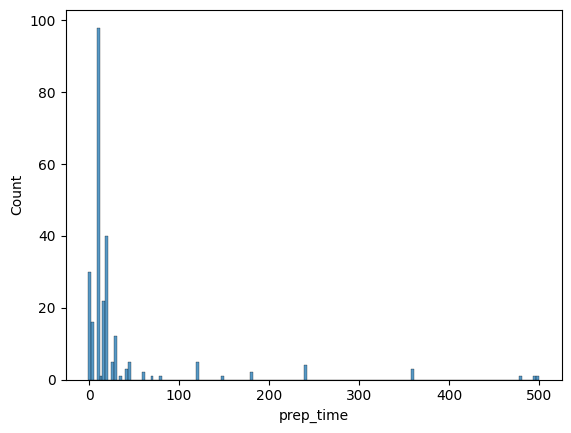

In [53]:
# Checking skewness
sns.histplot(x = df['prep_time'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cook_time', ylabel='Count'>

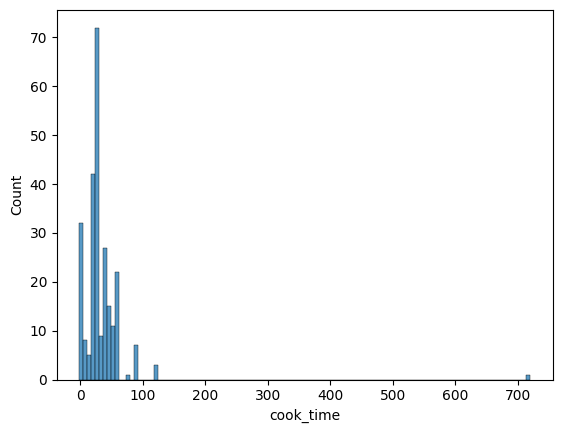

In [54]:
# checking skewness
sns.histplot(x = df['cook_time'])

In [55]:
## Other way to check skewness
print(df['cook_time'].skew())
print(df['prep_time'].skew())


11.433429571676463
4.636300925063016


####  Highly right(+ve) skewed
- use median to replace -1 values in skewed case(more robust than mean)

In [56]:
# Find median foor cook and prep time
cook_time_median = int(np.round(df['cook_time'].median()))
prep_time_median = int(np.round(df['prep_time'].median()))

print(cook_time_median , prep_time_median)

30 10


In [57]:
# replacing -1 with respective median time
df['cook_time'] = df['cook_time'].replace(-1,cook_time_median)
df['prep_time'] = df['prep_time'].replace(-1,prep_time_median)

In [58]:
# verify again prep and cook time columns
df[(df['prep_time'] <= 0) | (df['cook_time'] <=0)]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,ingredients_list,num_ingredients,total_time


In [59]:
df['total_time'] = df['prep_time']+df['cook_time']

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_time', ylabel='Count'>

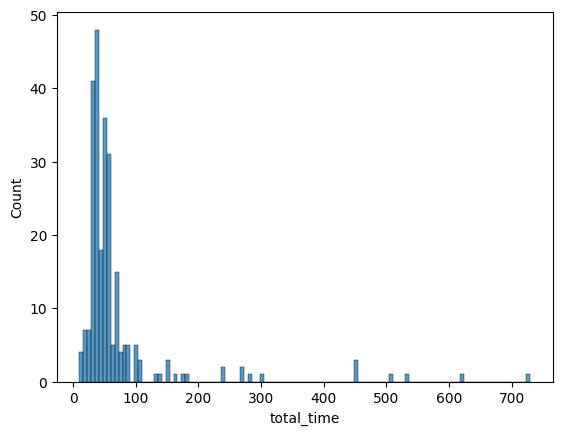

In [60]:
total_time = df['total_time']
sns.histplot(x = total_time)

#### ‼️ How to set categories for time spent?

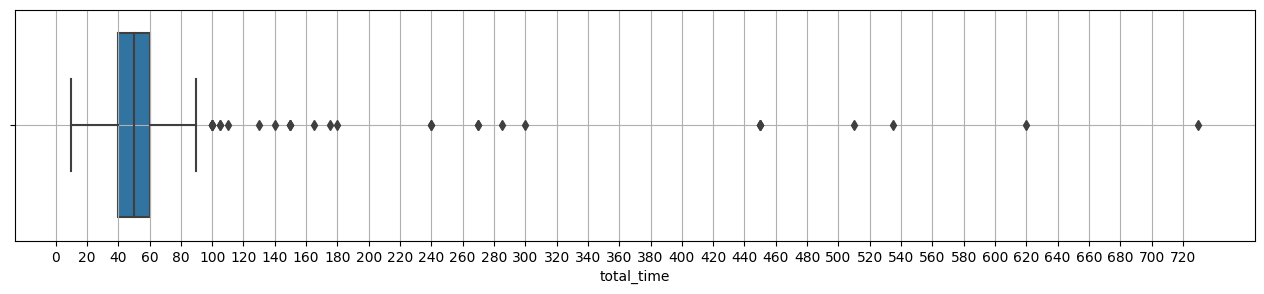

In [61]:
# 
plt.figure(figsize=(16, 3)) # w=16,h=4
sns.boxplot(x=total_time)

# Set x-ticks at regular intervals
plt.xticks(np.arange(0, total_time.max() + 1, 20))  # every 20 units, adjust as needed

plt.grid(True)
plt.show()

#### ℹ️ Based on above curve we have finalized following bins to categories total time 


<div style="text-align: center;">
  <img src="https://raw.githubusercontent.com/hardikdhamija96/IndianFoodPreference/refs/heads/main/TimeCategory.png" width="400"/>
</div>


In [62]:
## creating new column
bins = [0,40,60,90,total_time.max()+1] # +1 to add last element
labels = ['Quick','Moderate','Long','Very Long']

df['time_category'] = pd.cut(total_time, bins=bins, labels=labels,right=False) 
#right=false ---> quick = [0,39]

In [63]:
df['time_category'].value_counts()

time_category
Moderate     109
Quick         60
Long          52
Very Long     34
Name: count, dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name              255 non-null    object  
 1   ingredients       255 non-null    object  
 2   diet              255 non-null    category
 3   prep_time         255 non-null    int64   
 4   cook_time         255 non-null    int64   
 5   flavor_profile    255 non-null    category
 6   course            255 non-null    category
 7   state             255 non-null    category
 8   region            255 non-null    category
 9   ingredients_list  255 non-null    object  
 10  num_ingredients   255 non-null    int64   
 11  total_time        255 non-null    int64   
 12  time_category     255 non-null    category
dtypes: category(6), int64(4), object(3)
memory usage: 17.4+ KB


In [65]:
# Diet Ratio
diet_ratio = df['diet'].value_counts().reset_index()

diet_ratio

,diet,count
0,vegetarian,226
1,non vegetarian,29


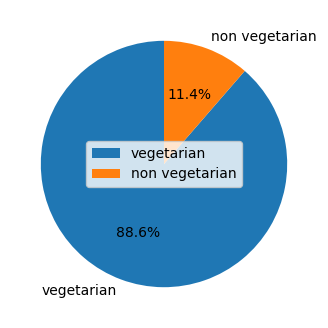

In [66]:
plt.figure(figsize=(4,4))

plt.pie(diet_ratio['count'], labels=diet_ratio['diet'],autopct='%.1f%%', startangle=90)
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


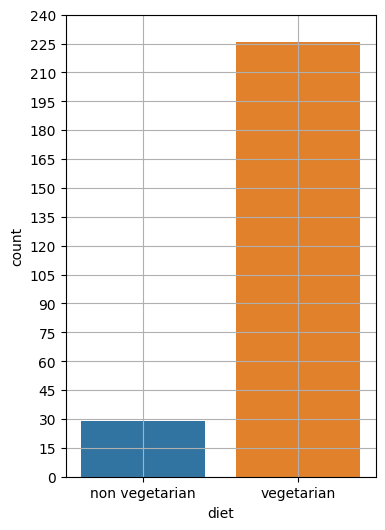

In [67]:
plt.figure(figsize=(4,6))
sns.countplot(x="diet",data=df)
plt.yticks(np.arange(0,250,15))
plt.grid()
plt.show()

In [68]:
# Ratio of flavour profile
flavor_ratio = df['flavor_profile'].value_counts().reset_index()
flavor_ratio

,flavor_profile,count
0,spicy,133
1,sweet,88
2,unknown,29
3,bitter,4
4,sour,1


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


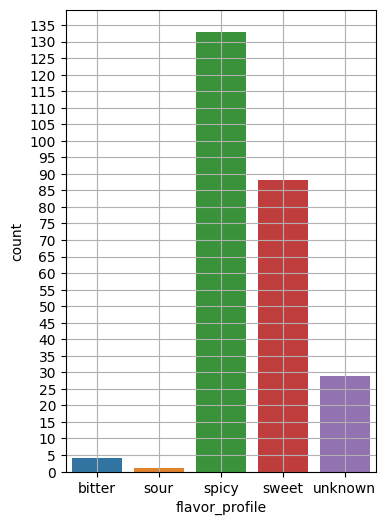

In [69]:
plt.figure(figsize=(4,6))
sns.countplot(x=df['flavor_profile'])
plt.yticks(np.arange(0,140,5))
plt.grid()
plt.show()


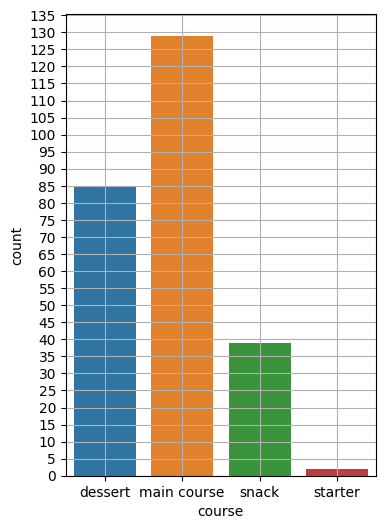

In [70]:
plt.figure(figsize=(4,6))
sns.countplot(x=df['course'])
plt.yticks(np.arange(0,140,5))
plt.grid()
plt.show()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name              255 non-null    object  
 1   ingredients       255 non-null    object  
 2   diet              255 non-null    category
 3   prep_time         255 non-null    int64   
 4   cook_time         255 non-null    int64   
 5   flavor_profile    255 non-null    category
 6   course            255 non-null    category
 7   state             255 non-null    category
 8   region            255 non-null    category
 9   ingredients_list  255 non-null    object  
 10  num_ingredients   255 non-null    int64   
 11  total_time        255 non-null    int64   
 12  time_category     255 non-null    category
dtypes: category(6), int64(4), object(3)
memory usage: 17.4+ KB


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


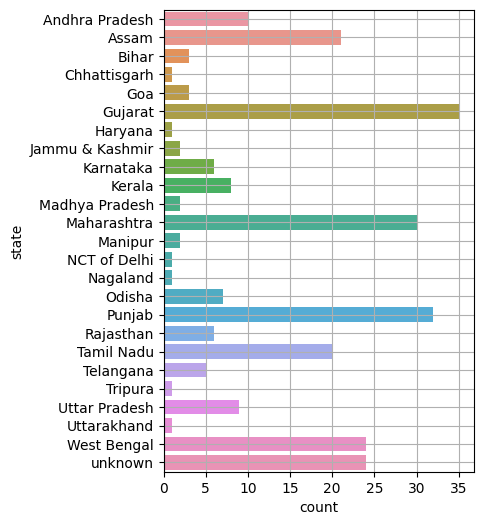

In [72]:
plt.figure(figsize=(4,6))
sns.countplot(y=df['state'])
plt.xticks(np.arange(0,40,5))
plt.grid()
plt.show()

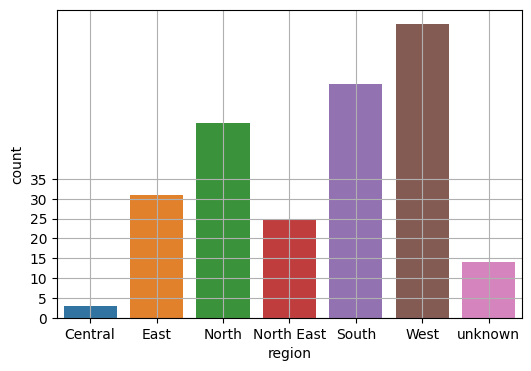

In [73]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['region'])
plt.yticks(np.arange(0,40,5))
plt.grid()
plt.show()